This notebooks aims to explore the train dataset. The goal is to check for outliers, understand the distribution for each feature and apply transformations when necessary. At the end of this notebook we expect to obtain the template dataset after preprocessing.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
raw: pd.DataFrame = pd.read_csv('data/train.csv', index_col=0)
print(f'Train dataset shape: {raw.shape}')
raw.head()

Train dataset shape: (891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


As a first iteration, we choose to drop the columns Name, Ticket and Cabin, since it would require a lot of preprocessing and we are not certain that these columns are required for a good prediction.

In [3]:
raw.drop(labels=['Name', 'Ticket', 'Cabin'], axis='columns', inplace=True)
raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


The missing values for Age are going to be considered the mean. For Embarked, the mode.

In [4]:
raw['Age'] = raw['Age'].fillna(raw['Age'].mean())
raw['Embarked'] = raw['Embarked'].fillna(raw['Embarked'].mode()[0])

The histograms for each column are plotted bellow.

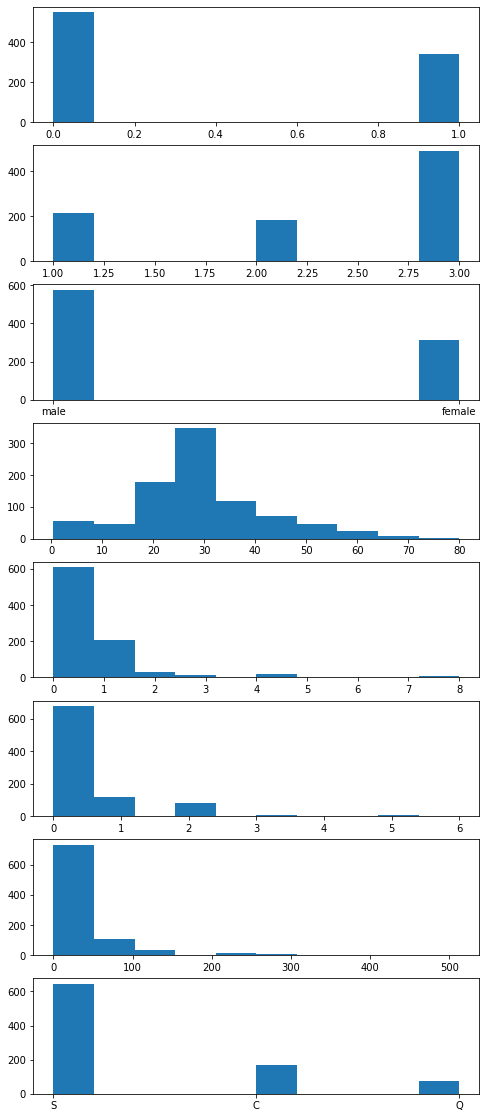

In [5]:
fig, axs = plt.subplots(8, 1, figsize=(8, 20))
for col, ax in zip(raw.columns, axs):
    ax.hist(raw[col])
plt.show()

The boxplot indicates that the Fare column has a lot of outlier values. To correct this, the column is log tranformed.

<AxesSubplot:>

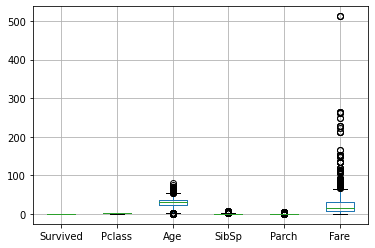

In [6]:
raw.boxplot()

In [7]:
print(f"Fare skewness before log: {raw['Fare'].skew()}")
raw['Fare'] = raw['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
print(f"Fare skewness after log: {raw['Fare'].skew()}")

Fare skewness before log: 4.787316519674893
Fare skewness after log: 0.44310881405404506


The categorical columns are transformed using one-hot encoding

In [8]:
sex_dummy = pd.get_dummies(raw['Sex'])
raw = pd.concat([raw, sex_dummy], axis=1)
raw.drop('Sex', axis=1, inplace=True)

In [9]:
embarked_dummy = pd.get_dummies(raw['Embarked'], prefix='Embarked')
raw = pd.concat([raw, embarked_dummy], axis=1)
raw.drop('Embarked', axis=1, inplace=True)

In [10]:
pclass_dummy = pd.get_dummies(raw['Pclass'], prefix='Pclass')
raw = pd.concat([raw, pclass_dummy], axis=1)
raw.drop('Pclass', axis=1, inplace=True)

<AxesSubplot:>

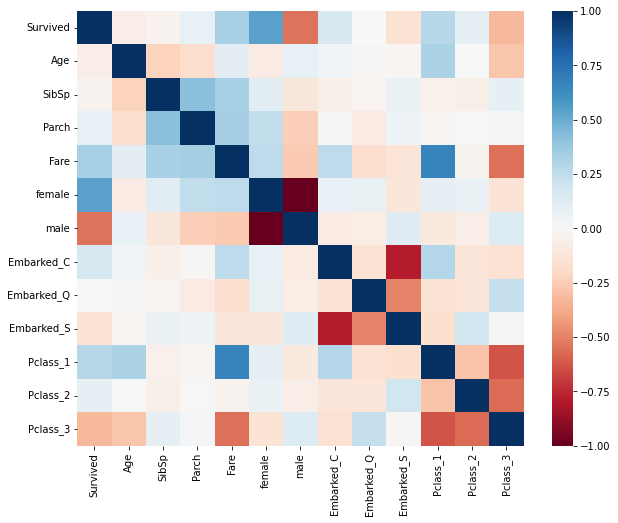

In [11]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(raw.corr(), cmap='RdBu')

In [12]:
raw.corr()['Survived'].abs().sort_values()

Embarked_Q    0.003650
SibSp         0.035322
Age           0.069809
Parch         0.081629
Pclass_2      0.093349
Embarked_S    0.149683
Embarked_C    0.168240
Pclass_1      0.285904
Pclass_3      0.322308
Fare          0.331805
female        0.543351
male          0.543351
Survived      1.000000
Name: Survived, dtype: float64

Columns with low correlation are dropped, and we can see the template for the dataset after preprocessing.

In [13]:
raw.drop(labels=['Embarked_Q', 'SibSp', 'Age', 'Parch', 'Pclass_2'],
         axis='columns',inplace=True)
raw

,Survived,Fare,female,male,Embarked_C,Embarked_S,Pclass_1,Pclass_3
PassengerId,,,,,,,,
1,0,1.981001,0,1,0,1,0,1
2,1,4.266662,1,0,1,0,1,0
3,1,2.070022,1,0,0,1,0,1
4,1,3.972177,1,0,0,1,1,0
5,0,2.085672,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...
887,0,2.564949,0,1,0,1,0,0
888,1,3.401197,1,0,0,1,1,0
889,0,3.154870,1,0,0,1,0,1
